In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
# from blimpy import read_header, Waterfall, Filterbank


%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.insert(0, "../setigen/")
import setigen as stg

from astropy import units as u

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
stg.choppy_rfi_path?

Signature: stg.choppy_rfi_path(f_start, drift_rate, spread, spread_type='uniform')
Docstring:
A crude simulation of one style of RFI that shows up, in which the signal
jumps around in frequency. This example samples the center frequency for
each time sample from either a uniform or normal distribution.

Argument spread_type can be either 'uniform' or 'normal'.

Note: another approach could be to random walk the frequency over time.
File:      ~/Documents/Research/Breakthrough-Listen/Code/setigen/setigen/funcs/paths.py
Type:      function


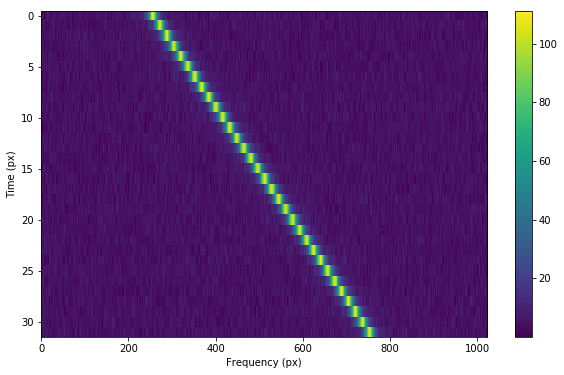

In [4]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

start_index = 256
end_index = 256*3

drift_rate = frame.get_drift_rate(start_index, end_index)

signal = frame.add_signal(stg.constant_path(f_start = frame.fs[start_index], 
                                            drift_rate = drift_rate),
                          stg.constant_t_profile(level = 100),
                          stg.voigt_f_profile(g_width=30*u.Hz, l_width=30*u.Hz),
                          stg.constant_bp_profile(level = 1))

fig = plt.figure(figsize=(10, 6))
frame.render()

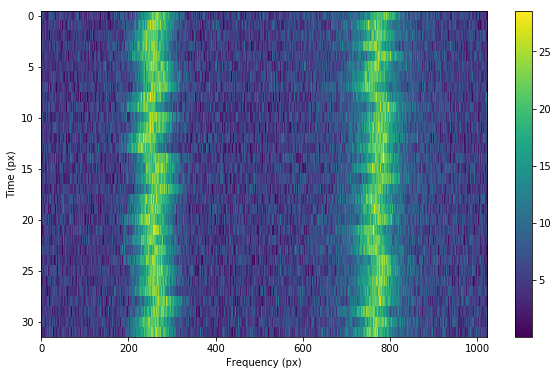

In [5]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[256], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 30*u.Hz,
                                              spread_type='normal'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          stg.gaussian_f_profile(width=200*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[3*256], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 30*u.Hz,
                                              spread_type='normal'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          stg.lorentzian_f_profile(width=200*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.render()

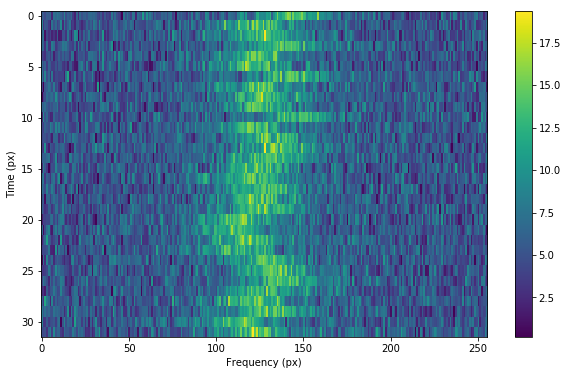

In [6]:
frame = stg.Frame(fchans=256*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

# signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[256], 
#                                               drift_rate = 0*u.Hz/u.s,
#                                               spread = 30*u.Hz,
#                                               spread_type='normal'),
#                           stg.constant_t_profile(level=frame.get_intensity(snr=50)),
#                           stg.gaussian_f_profile(width=200*u.Hz),
#                           stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[128], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 30*u.Hz,
                                              spread_type='normal'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=25)),
                          stg.lorentzian_f_profile(width=100*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.render()

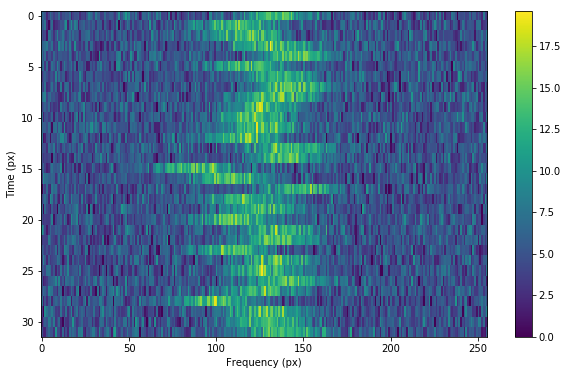

In [7]:
frame = stg.Frame(fchans=256*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[128], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 30*u.Hz,
                                              spread_type='normal'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=25)),
                          stg.gaussian_f_profile(width=100*u.Hz),
                          stg.constant_bp_profile(level=1))

# signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[128], 
#                                               drift_rate = 0*u.Hz/u.s,
#                                               spread = 30*u.Hz,
#                                               spread_type='normal'),
#                           stg.constant_t_profile(level=frame.get_intensity(snr=50)),
#                           stg.lorentzian_f_profile(width=200*u.Hz),
#                           stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.render()

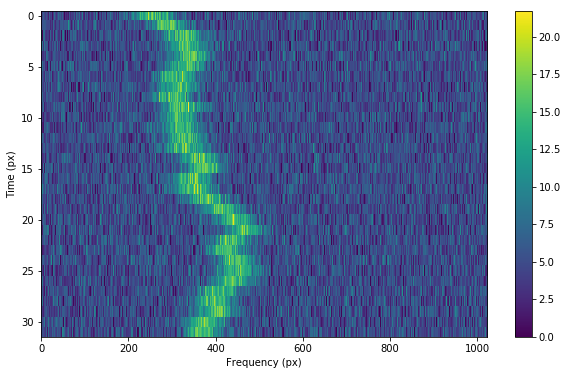

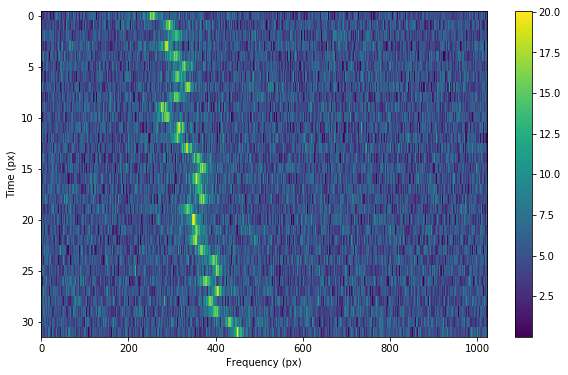

In [8]:
def random_walk_path(f_start, step):
    """
    """
    f_start = stg.unit_utils.get_value(f_start, u.Hz)
    step = stg.unit_utils.get_value(step, u.Hz)
    
    f_path = [f_start]
    for i in range(32 - 1):
        x = f_path[i]
        p_step = np.random.uniform(0, step)
#         p_step=step
        if np.random.rand() < 0.5:
            f_path.append(x - p_step)
        else:
            f_path.append(x + p_step)
            
    return f_path

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(random_walk_path(f_start = frame.fs[256], 
                                           step = 100*u.Hz,),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.gaussian_f_profile(width=200*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.render()

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(random_walk_path(f_start = frame.fs[256], 
                                           step = 100*u.Hz,),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.lorentzian_f_profile(width=50*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.render()

In [ ]:
# 176472 for thin 

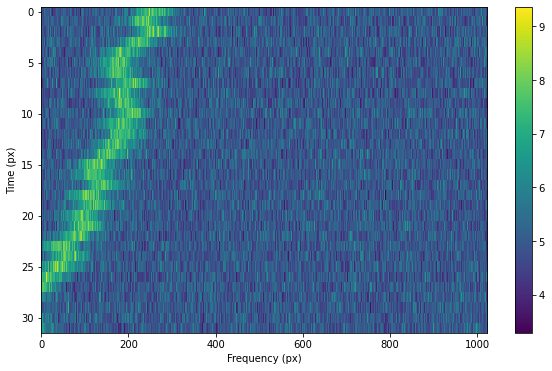

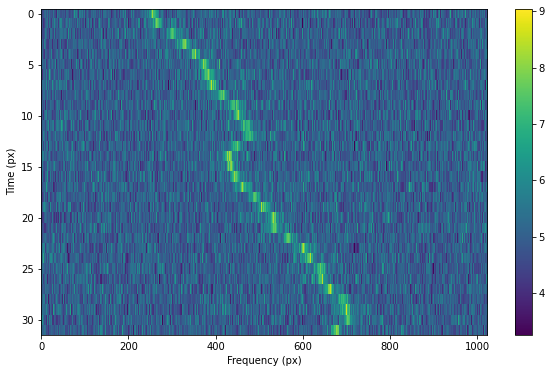

In [12]:
def random_walk_path(f_start, max_step, right_prob=0.5):
    """
    """
    f_start = stg.unit_utils.get_value(f_start, u.Hz)
    max_step = stg.unit_utils.get_value(max_step, u.Hz)
    
    f_path = [f_start]
    for i in range(32 - 1):
        x = f_path[i]
        p_step = np.random.uniform(0, max_step)
#         p_step=step
        if np.random.rand() > right_prob:
            f_path.append(x - p_step)
        else:
            f_path.append(x + p_step)
            
    return f_path

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(random_walk_path(f_start = frame.fs[256], 
                                           max_step = 100*u.Hz,
                                          right_prob=0.5),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.gaussian_f_profile(width=200*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.render()

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(random_walk_path(f_start = frame.fs[256], 
                                           max_step = 100*u.Hz,
                                          right_prob=0.9),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.lorentzian_f_profile(width=50*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.render()

In [82]:
np.cumsum(np.random.uniform(-1, 1, size=(10)))

array([-0.21935936, -0.90620199, -0.44674229, -1.12513836, -1.28698992,
       -1.29994514, -1.11327544, -2.04041929, -1.47693435, -1.33582913])

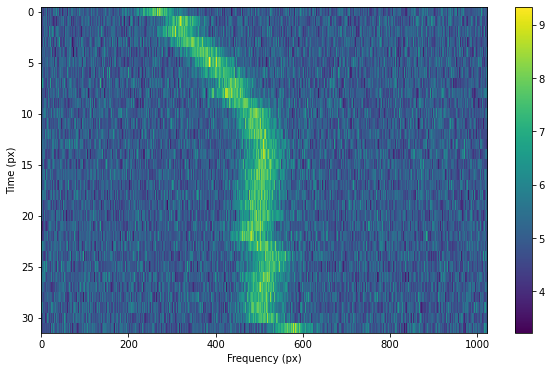

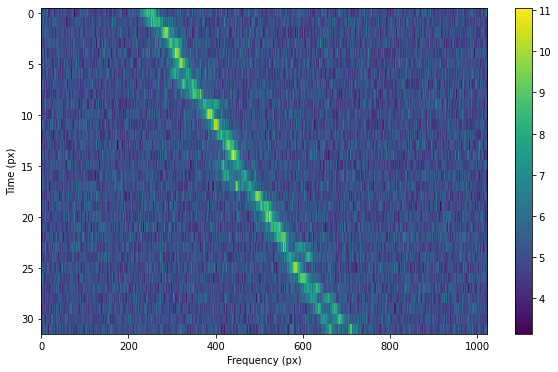

In [113]:
def random_walk_path(f_start, drift_rate, max_step):
    """
    """
    f_start = stg.unit_utils.get_value(f_start, u.Hz)
    drift_rate = stg.unit_utils.get_value(drift_rate, u.Hz / u.s)
    max_step = stg.unit_utils.get_value(max_step, u.Hz)
    
    def path(t):
        # t should be an array here
        f_offset = np.random.uniform(-max_step, max_step, t.shape)
        f_offset = np.random.normal(0, max_step/2, t.shape)
        f_cumsum = np.cumsum(f_offset)
        return f_start + drift_rate * t + f_cumsum
    return path

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(random_walk_path(f_start = frame.fs[256], 
                                           drift_rate = 2*u.Hz/u.s,
                                           max_step = 100*u.Hz),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.gaussian_f_profile(width=200*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.render()

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(random_walk_path(f_start = frame.fs[256],
                                           drift_rate = 2*u.Hz/u.s,
                                           max_step = 100*u.Hz,),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.lorentzian_f_profile(width=50*u.Hz),
                          stg.constant_bp_profile(level=1))
signal = frame.add_signal(stg.constant_path(f_start = frame.fs[256],
                                           drift_rate = 2*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.lorentzian_f_profile(width=50*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.render()

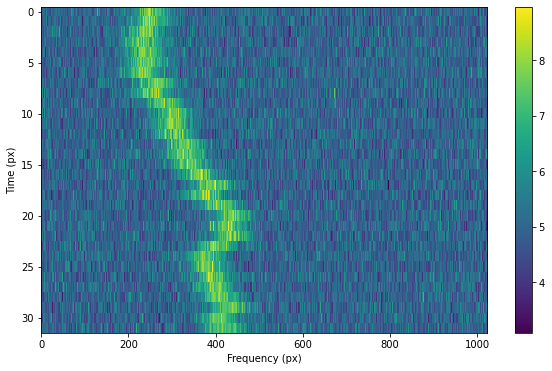

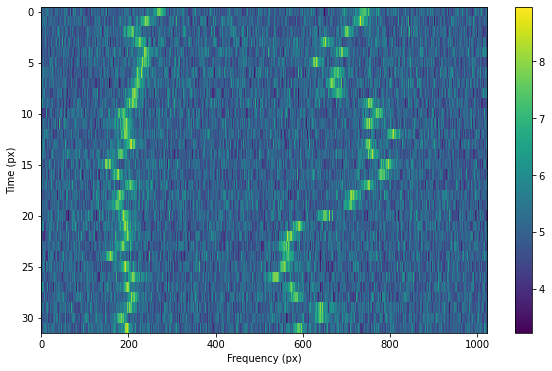

In [63]:
np.random.seed(42)

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(stg.simple_rfi_path(f_start = frame.fs[256], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 200*u.Hz,
                                              rfi_type='random_walk'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.gaussian_f_profile(width=200*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.render()

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(stg.simple_rfi_path(f_start = frame.fs[256], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 200*u.Hz,
                                               rfi_type='random_walk'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.lorentzian_f_profile(width=50*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.simple_rfi_path(f_start = frame.fs[768], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 200*u.Hz,
                                              spread_type='normal',
                                               rfi_type='random_walk'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.lorentzian_f_profile(width=50*u.Hz),
                          stg.constant_bp_profile(level=1))


fig = plt.figure(figsize=(10, 6))
frame.render()

In [20]:
2 * np.sqrt(2 * np.log(2))

2.3548200450309493

In [41]:
1/2.3548200450309493

0.42466090014400953